In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'Memory': np.array([5, 5, 6, 6, 7, 7, 7, 8, 9, 9, 10, 4, 11, 13, 13, 13, 16, 16, 19, 20]),

    'Anxiety': np.array([20, 21, 24, 32, 32, 21, 45, 45, 31, 22, 44, 45, 46, 49, 45, 60, 56, 57, 48, 41]),

    'Depression': np.array([0, 0, 0, 1, 1, 1, 3, 3, 5, 8, 6, 6, 7, 8, 10, 16, 20, 13, 28, 24]),

    'Self-Esteem': np.array([16, 15, 19, 18, 17, 18, 16, 10, 15, 15, 14, 13, 15, 12, 10, 9, 2, 2, 12, 1])

    })

In [ ]:
# Correlations
correlations = df.corr()
correlations

,Memory,Anxiety,Depression,Self-Esteem
Memory,1.000000,0.631711,0.925598,-0.786000
Anxiety,0.631711,1.000000,0.624016,-0.678946
Depression,0.925598,0.624016,1.000000,-0.746602
Self-Esteem,-0.786000,-0.678946,-0.746602,1.000000


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#Model features
X = df[['Anxiety','Depression','Self-Esteem']]
#label
y = df[['Memory']]

In [ ]:
#Model: linear regression model
model = LinearRegression()

#Training
model.fit(X,y)

LinearRegression()

In [ ]:
# to read the contribution of each independent variable
model.coef_

array([[ 0.0061383 ,  0.4383072 , -0.18240165]])

#### The order of contribution is: Depression, self esteem, axiety

In [ ]:
r_squared = model.score(X, y)
r_squared

0.8772391478014961

Based on the above analysis, what would be the predicted value of
Memory Bias for a person with an Anxiety score of 44, a
Depression score of 13 and a Self-Esteem score of 12?

In [ ]:
data = pd.DataFrame({

    'Anxiety': np.array([44]),

    'Depression': np.array([13]),

    'Self-Esteem': np.array([12])

    })

In [ ]:
y = model.predict(data)
y

array([[12.50308058]])

(d) Using the same data, perform a multiple regression to determine
the best predictor of Memory Bias.
--> already been addressed above, the best predictor is depression


(e) Using the same data, perform a multiple regression to test the idea that Anxiety is the salient predictor of Memory Bias. Enter Anxiety
on the first step, and Depression and Self-Esteem on the second.

In [ ]:
## Testing the model with Anxiety being the solo features

In [ ]:
#Model features
X_anxiety = df[['Anxiety']]
#label
y = df[['Memory']]

#Model: linear regression model
model1 = LinearRegression()

#Training
model1.fit(X_anxiety,y)
score_anxiety = model1.score(X_anxiety, y)
score_anxiety

0.39905858271905825

In [ ]:
#Model features
X_dep_esteem = df[['Depression','Self-Esteem']]
#label
y = df[['Memory']]

#Model: linear regression model
model2 = LinearRegression()

#Training
model2.fit(X_dep_esteem,y)
score = model2.score(X_dep_esteem, y)
score

0.8770996995585987

## Therapy Analysis

In [ ]:
# Categorial features -> numeric ones
# Levels: A1 --> 0 and A2 --->1
# duration:  short -->0 , medium -->1 , long --> 2

In [ ]:
df = pd.DataFrame({

    'duration': np.array([0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2]),

    'level': np.array([0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1]),

    'improvement index': np.array([6,9,8,5,10,11,5,9,15,18,16,20,9,12,13,9,10,12,9,13,8,7,9,12]),
    })

In [ ]:
mean_improvement_index = df['improvement index'].mean()
mean_improvement_index

10.625

In [ ]:
vr_improvement_index = df['improvement index'].var()
vr_improvement_index

14.592391304347826

In [ ]:
from statsmodels.formula.api import ols
# Fit the model
model = ols('Q("improvement index") ~ C(duration) * C(level)', data=df).fit()

# Perform ANOVA and display the table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

PatsyError: ignored

In [ ]:
# Plot the interaction in two ways:
# i. Duration x Therapy
# ii. Therapy x Duration

In [ ]:
import seaborn as sns

<Axes: xlabel='duration', ylabel='improvement index'>

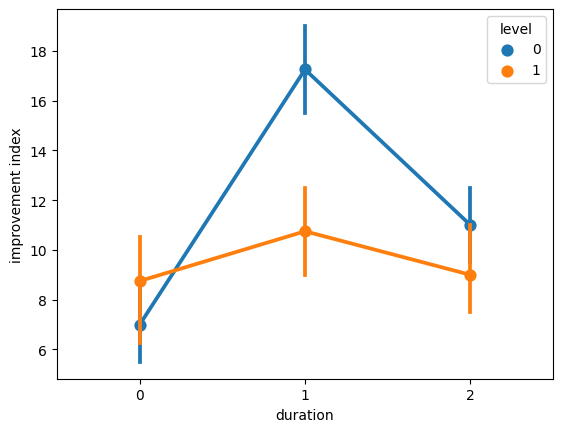

In [ ]:
sns.pointplot(data=df, x="duration", y="improvement index", hue = "level")

<Axes: xlabel='level', ylabel='improvement index'>

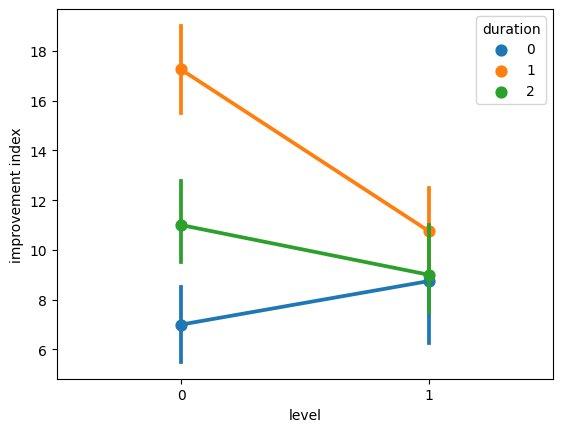

In [ ]:
sns.pointplot(data=df, x="level", y="improvement index", hue = "duration")

In [ ]:
# (d) Perform the simple effects analyses of the following and comment
# on the significance of the following simple effects:
# i. Duration at New Therapy (B at A1)
# ii. Therapy at Mid-term (A at B2)
# iii. Therapy at Long-term (A at B3)

In [ ]:
# Duration at New Therapy (B at A1)
model = ols('Q("improvement index") ~ C(duration) ', data=df[df['level']==0]).fit()

# Perform ANOVA and display the table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

KeyError: ignored

In [ ]:
#Therapy at Mid-term (A at B2)
model = ols('Q("improvement index") ~ C(level) ', data=df[df['duration']==1]).fit()

# Perform ANOVA and display the table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

KeyError: ignored

In [ ]:
#Therapy at Long-term (A at B3)
model = ols('Q("improvement index") ~ C(level) ', data=df[df['duration']==2]).fit()

# Perform ANOVA and display the table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

KeyError: ignored

In [ ]:
#Provide the conclusions drawn from the simple effects analyses?

In [ ]:
# 1. For new therapy (represented by 0 in our feature engineering), the session duration is a significant feature that affect the improvement outcome by high confidence give F~27(p value = 0.000144)
# 2. For medium time therapy (represented by 1 in our feature engineering), the session level (old vs new) is a significant feature that affect the improvement outcome by high confidence give F~ 18(p value = 0.0.005128)
# 3. For long time session, the session level is not really a significant feature (F=2) with high probability of error (0.207031)


PART 3

In [ ]:
import pandas as pd
import numpy as np

# we create the y columns such as 35 numbers are uniform at random distribtued between [0,1] and 25 of them are distributed between [1,2]
array1 = np.random.rand(35)
array2 = np.random.rand(25) + 1
array_y = np.concatenate ((array1, array2), axis= 0)
array_y

# we create the x axis in a way that x is smaller mostly when y is between 0 and 1

array1_x = 5*np.random.rand(35)
array2_x = 5*np.random.rand(25) + 5
array_x = np.concatenate ((array1_x, array2_x), axis= 0)
array_x

df = pd.DataFrame({
    'X': array_x,

    'y': array_y,

    })

Text(0, 0.5, 'y')

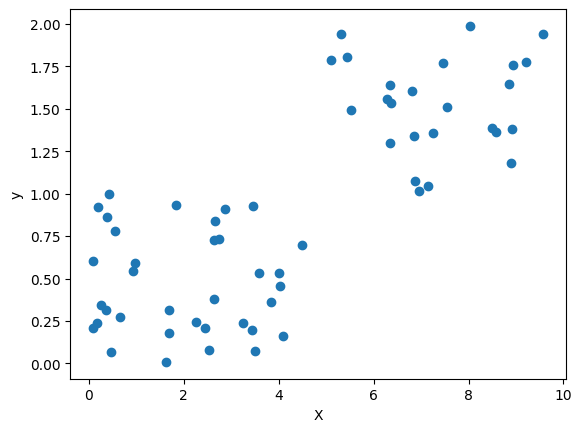

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['X'], df['y'])
plt.xlabel("X")
plt.ylabel("y")

In [ ]:
# plot the distribution

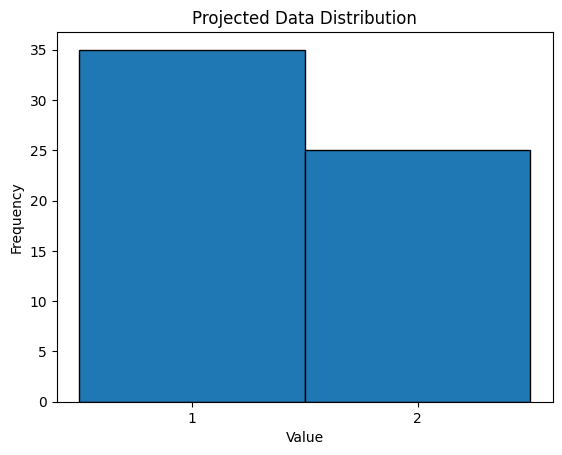

In [ ]:
# Project data: everything between 0 and 1 to 1, and between 1 and 2 to 2
projected_data = np.where(df['y'] <= 1, 1, 2)

# Plot the distribution
plt.hist(projected_data, bins=[0.5, 1.5, 2.5], edgecolor='black')
plt.xticks([1, 2])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Projected Data Distribution')
plt.show()

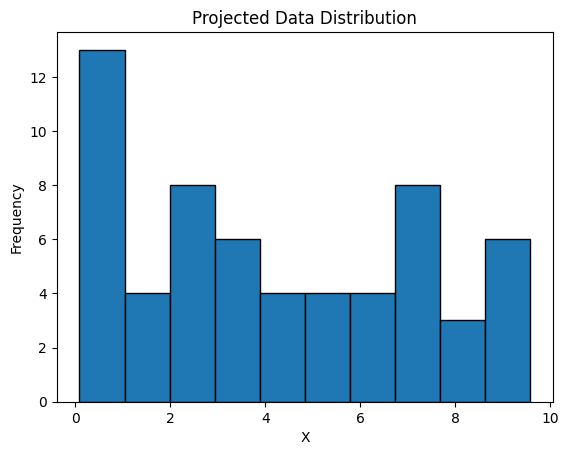

In [ ]:

plt.hist(df['X'],  edgecolor='black')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.title('Projected Data Distribution')
plt.show()

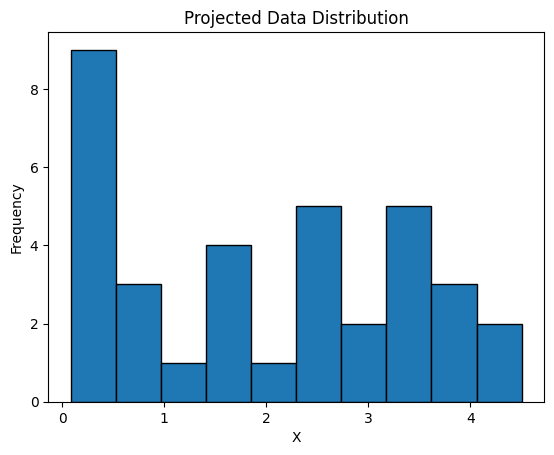

In [ ]:
data = df[df['y']<1]
plt.hist(data['X'],  edgecolor='black')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.title('Projected Data Distribution')
plt.show()

## Task 4:

In [ ]:
def transform_drug(d):

    if d == "placebo":
        return (0)
    elif d =="anxifree":
        return (1)

    else: return (2)
def discretize_label(y):

    if y <1:
        return (0)


    else: return (1)

In [ ]:
def d(d):

    if d == "no.therapy":
        return (0)


    else: return (1)

In [ ]:
import pandas as pd
import numpy as np

df_clinical_trial = pd.read_csv('clinical_trial_data.csv')
df_clinical_trial

# convert categorial features into numeric ones
df_clinical_trial['drug'] = np.array([ transform_drug(x) for x in df_clinical_trial['drug']] )
df_clinical_trial['therapy'] = np.array([ transform_therapy(x) for x in df_clinical_trial['therapy']] )
df_clinical_trial['mood_gain'] = np.array([ discretize_label(x) for x in df_clinical_trial['mood_gain']] )

NameError: ignored

In [ ]:
df_clinical_trial

,drug,therapy,mood_gain
0,0,no.therapy,0.5
1,0,no.therapy,0.3
2,0,no.therapy,0.1
3,1,no.therapy,0.6
4,1,no.therapy,0.4
5,1,no.therapy,0.2
6,2,no.therapy,1.4
7,2,no.therapy,1.7
8,2,no.therapy,1.3
9,0,CBT,0.6


In [ ]:
#Panic Study
def transform_drug(d):

    if d == "fourgrams":
        return (0)
    elif d =="eightgrams":
        return (1)

    else: return (2)
def transform_therapy(d):

    if d == "Cog":
        return (0)
    elif d =="Beh":
        return (1)

    else: return (2)

def discretize_label(y):

    if y <=55:
        return (0)


    else: return (1)

In [ ]:
df_panic = pd.read_csv('PanicSymptoms.csv')
# convert categorial features into numeric ones
df_panic['drug'] = np.array([ transform_drug(x) for x in df_panic['drug']] )
df_panic['therapy'] = np.array([ transform_therapy(x) for x in df_panic['therapy']] )
df_panic['panic_symptoms'] = np.array([ discretize_label(x) for x in df_panic['panic_symptoms']] )

In [ ]:
df_panic


,drug,therapy,panic_symptoms
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
85,2,2,0
86,2,2,0
87,2,2,0
88,2,2,0


In [ ]:
df_panic['panic_symptoms'].unique()

array([1, 0])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model

logistic_regression = LogisticRegression()
svc = SVC()
linearsvc = LinearSVC()
knn = KNeighborsClassifier(n_neighbors=3)
reg = linear_model.BayesianRidge()

In [ ]:
#fit the models:

# Clinical trial classfier:
X = df_clinical_trial[['drug','therapy']]
y = df_clinical_trial['mood_gain']
logistic_regression.fit(X,y)
svc.fit(X,y)
linearsvc.fit(X,y)
knn.fit(X,y)
reg.fit(X,y)

ValueError: ignored

In [ ]:
y = df_clinical_trial[['mood_gain']]

In [ ]:
y.shape

(18, 1)

In [ ]:
y = iris.target
y.shape

NameError: ignored

In [ ]:
y

,mood_gain
0,0.5
1,0.3
2,0.1
3,0.6
4,0.4
5,0.2
6,1.4
7,1.7
8,1.3
9,0.6


In [ ]:
coleur = [ x for x in df_clinical_trial['mood_gain']]
coleur

[0.5,
 0.3,
 0.1,
 0.6,
 0.4,
 0.2,
 1.4,
 1.7,
 1.3,
 0.6,
 0.9,
 0.3,
 1.1,
 0.8,
 1.2,
 1.8,
 1.3,
 1.4]

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

classifier = LogisticRegression().fit(X, y)

disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X, response_method="predict",
    xlabel="Drug", ylabel="therapy",
    alpha=0.5,
)
disp.ax_.scatter( df_clinical_trial['drug'],  df_clinical_trial['therapy'], c = coleur)
plt.show()

ValueError: ignored

In [ ]:
df_clinical_trial['drug']


0     0
1     0
2     0
3     1
4     1
5     1
6     2
7     2
8     2
9     0
10    0
11    0
12    1
13    1
14    1
15    2
16    2
17    2
Name: drug, dtype: int64

In [ ]:
logistic_regression_panic = LogisticRegression()
svc_panic = SVC()
linearsvc_panic = LinearSVC()
knn_panic = KNeighborsClassifier(n_neighbors=3)
reg_panic = linear_model.BayesianRidge()

In [ ]:
#fit the models:

# panic symptoms experiment classfier:
X = df_panic[['drug','therapy']]
y = df_panic['panic_symptoms']
logistic_regression_panic.fit(X,y)
svc_panic.fit(X,y)
linearsvc_panic.fit(X,y)
knn_panic.fit(X,y)
reg_panic.fit(X,y)

BayesianRidge()